In [13]:
import numpy as np
import matplotlib.pyplot as plt

lines = []
with open("trial.txt", "r") as f:
    lines = f.readlines()

data = []
for line in lines:
    line = line.strip('\n').split(',')
    data.append(line)
data = np.array(data, dtype=np.float32)
x_acc, y_acc, z_acc, x_ang, y_ang, z_ang, t = data[:, 0],data[:, 1], data[:, 2], data[:, 3], data[:, 4], data[:, 5], data[:,6]*0.001
print(data.shape)

# Sampling Rate
rec_time = t[-1]-t[0]
s = data.shape[0]/rec_time
print(f"{s} Hz")

(5376, 7)
197.19750168332453 Hz


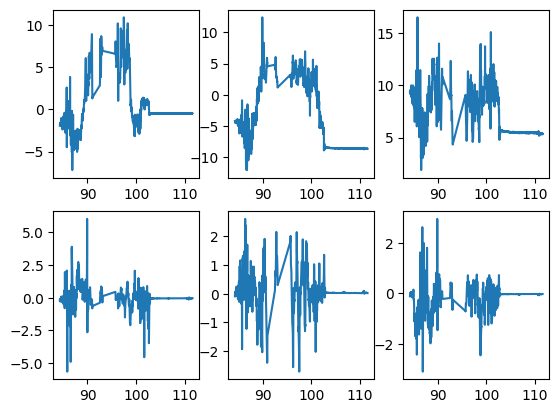

In [7]:
def plotFigs():
    fig, axes = plt.subplots(nrows=2, ncols=3)
    axes[0,0].plot(t,x_acc)
    axes[0,1].plot(t,y_acc)
    axes[0, 2].plot(t,z_acc)
    axes[1, 0].plot(t,x_ang)
    axes[1, 1].plot(t,y_ang)
    axes[1, 2].plot(t,z_ang)

    plt.show()

plotFigs()

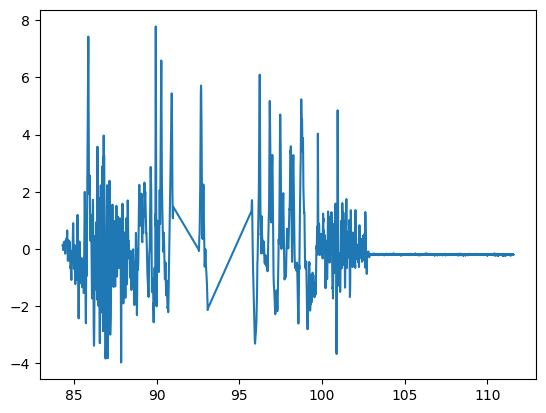

In [8]:
def ProcessData():
    # Data collection Phase
    mag = np.sqrt(pow(x_acc,2)+pow(y_acc,2)+pow(z_acc,2))
    avgmag = np.average(mag)
    netmag = mag-avgmag
    return netmag

netmag = ProcessData()
plt.plot(t, netmag)
plt.show()


In [9]:
filt_x = x_acc - np.average(x_acc)
filt_y = y_acc - np.average(y_acc)
filt_z = z_acc - np.average(z_acc)

39 -1.13532664e-07
-2.911093952790021e-09
Walking Step Count: 1550
First Walking Peak: 0.005071058159782773


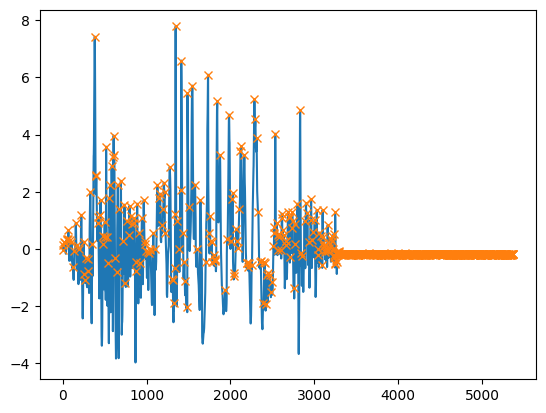

In [12]:
# Peak Detection Phase
from scipy.signal import find_peaks

StepRate = 5
SamplingRate = s
n_p = round(SamplingRate/StepRate)
print(n_p, np.average(filt_x)+np.average(filt_y)+np.average(filt_z))
threshold = (np.average(filt_x)+np.average(filt_y)+np.average(filt_z))/n_p
print(threshold)
Walkpeaks, _ = find_peaks(netmag, prominence=threshold)

print(f"Walking Step Count: {2*len(Walkpeaks)}")
print(f"First Walking Peak: {Walkpeaks[0]/s}")


plt.plot(netmag)
plt.plot(Walkpeaks, netmag[Walkpeaks], "x")
plt.show()